## Introduction to topaz

This tutorial tries to give the user a first idea about the features of the `topaz` application of `polymake`. We take a look at a variety of small examples.

First, we have to make `topaz` the current application. For this you can either start `polymake` with the option `-A topaz`,

    
    polymake -A topaz

or, if you've already started `polymake`, type

    


In [1]:
application 'topaz';


in the `polymake` shell.

### Simplicial complexes

The most important object of the `topaz` application is the simplicial complex. There are several ways of obtaining one.

#### From faces

For example, you can specify some faces of the complex. You can pass them as an `Array< Set<Int> >`, or `Array< Array<Int> >`:

In [2]:
# $s = new SimplicialComplex(INPUT_FACES=>[new Set(0), new Set(0,1), new Set(1,2,3)]);
$s = new SimplicialComplex(INPUT_FACES=>[[0],[0,1],[1,2,3]]);

As you can see, redundancies are allowed -- `[0]` is not a facet of the complex, and thus not necessary for encoding `$s`. You can compute the inclusion maximal faces like this:

In [3]:
print $s->FACETS;

{0 1}
{1 2 3}


You can also pass the `FACETS` to the constructor, but be aware that in that case the vertices must be numbered increasingly starting with `0` and redundancies are prohibited.

Take a look at your complex using

In [4]:
$s->VISUAL;

<!--
polymake for knusper
Mon May 11 13:37:00 2020
s
-->


 
 
 s 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.

For more information on visualizing simplicial complex, see the section below.

`polymake` can compute the Hasse diagram of a simplicial complex (watch out, this gets really large for large complexes!). To print all the faces of the complex together with their rank in the face lattice, do this:

In [5]:
print $s->HASSE_DIAGRAM->DECORATION;

({-1} 4)
({0 1} 2)
({1 2 3} 3)
({0} 1)
({1} 1)
({1 2} 2)
({1 3} 2)
({2 3} 2)
({} 0)
({2} 1)
({3} 1)


The first entry of each pair denotes the face, the second is the rank. The `{-1}`-node is a dummy representing the whole complex. the `{}`-node is the empty face. If you want to look at a pretty graph representation, try the visualization:

    


In [6]:
$s->VISUAL_FACE_LATTICE;

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.0//EN" "http://www.w3.org/TR/2001/REC-SVG-20010904/DTD/svg10.dtd">
 
 Face lattice of s 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 1 
 
 1 2 3 
 
 0 
 
 1 
 
 1 2 
 
 1 3 
 
 2 3 
 
 
 
 2 
 
 3 
	<!--
	Generated using the Perl SVG Module V2.84
	by Ronan Oger
	Info: http://www.roitsystems.com/
	-->



#### Using clients

There are several clients that construct common simplicial complexes (for a comprehensive list, see the [topaz documentation](https://polymake.org/doku.php/documentation/latest/topaz)). An example is the torus client:

In [7]:
$t = torus();


Of course, `polymake` can compute the reduced integer homology groups of a simplicial complex, so we can convice ourselves this is a torus:

    


In [8]:
print $t->MANIFOLD;

true

In [9]:
print $t->HOMOLOGY;

({} 0)
({} 2)
({} 1)


The `i`-th line represents the $i$-th homology module. The curly braces contain torsion coefficients with multiplicity, the second pair entry denotes the Betti number. The empty curly braces indicate that `$t` is torsion-free. You can see a non-empty torsion group here (using the `rows_numbered` client for a pretty print with the corresponding dimensions):

In [10]:
print rows_numbered( real_projective_plane()->HOMOLOGY );

0:{} 0
1:{(2 1)} 0
2:{} 0


As expected, the first homology group has torsion coefficient `2` with multiplicity `1` and all Betti numbers are zero.

#### As boundary complex

If your complex is a pseudo-manifold, you can obtain a new complex from its boundary. For example, this produces a triangulation of the $2$-sphere:

In [11]:
$bs = simplex(3)->BOUNDARY;
print $bs->SPHERE;

true


#### Triangulating polytopes

The triangulation of a polytope is a simplicial complex, too. The `TRIANGULATION` gets stored in a property of the polytope. We use the `cube` client from the `polytope` application to demonstrate:

    


In [12]:
$c = polytope::cube(3);
$tc = $c->TRIANGULATION;
print $tc->FACETS;

{0 1 2 4}
{1 2 3 4}
{1 3 4 5}
{2 3 4 6}
{3 4 5 6}
{3 5 6 7}



### Geometric realizations

The `topaz` application is primarily designed to deal with abstract simplicial complexes that do not come with coordinates for an embedding in euclidean space. There is a special object subtype named `GeometricSimplicialComplex` that has extra properties for dealing with coodinates.

You can pass the coordinates to the constructor. Take care to choose an embedding without crossings!

    


In [13]:
$s = new GeometricSimplicialComplex(INPUT_FACES=>[[0],[0,1],[1,2,3]], COORDINATES=>[[1,0],[1,1],[0,2],[2,2]]);



Some clients produce complexes with geometric realization...

    


In [14]:
$b = ball(3);
# print a dense representation of the sparse matrix
print dense( $b->COORDINATES );

0 0 0
1 0 0
0 1 0
0 0 1


...some others provide the option `geometric_realization` so you can decide whether to invest the extra computing time.

    


In [15]:
$bs = barycentric_subdivision($b,geometric_realization=>1);


Again, see the [topaz documentation](https://polymake.org/doku.php/documentation/latest/topaz) for a comprehensive list.


### Visualization

Visualization of simplicial complexes uses the `VISUAL` property. Check out

    


In [16]:
help 'objects/SimplicialComplex/methods/Visualization/VISUAL';

VISUAL(Options) -> Visual::SimplicialComplex

 Visualizes the complex.

 If G_DIM < 4, the GRAPH and the facets
 are visualized using the COORDINATES.

 Otherwise, the spring embedder and the GRAPH are used to
 produce coordinates for the visualization.

 If JavaView is used to visualize the complex, all faces of
 one facet build a geometry in the jvx-file, so you may use
 Method -> Effect -> Explode Group of Geometries in the JavaView menu.

Options: 
  mixed_graph => Bool use the MIXED_GRAPH for the spring embedder
  seed => Int random seed value for the string embedder

Options:  Attributes modifying the appearance of filled polygons.
  FacetColor => Color filling color of the polygon
  FacetTransparency => Float transparency factor of the polygon between 0 (opaque) and 1 (completely translucent)
  FacetStyle => String if set to "hidden", the inner area of the polygon is not rendered
  EdgeColor => Color color of the boundary lines
  EdgeThickness => Float scaling factor for the thi


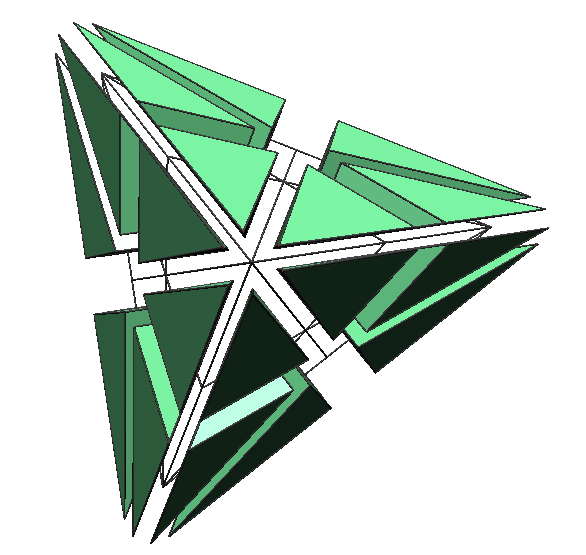
for a list of available options and this [tutorial](visual_tutorial.ipynb) for a general intro to visualization in polymake.

If your complex is of dimension three or lower, you can visualize a geometric realization together with the `GRAPH` of the complex using the `VISUAL` property. Note that if your complex is not a `GeometricSimplicialComplex`, `polymake` will use the spring embedder to find an embedding of the graph of the complex, which is not guaranteed to result in an intersection-free visualization.

    


In [17]:
$bs->VISUAL;

<!--
polymake for knusper
Mon May 11 13:37:01 2020
bs
-->


 
 
 bs 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


You should give the `explode` feature of jReality a try -- it gives a good (and pretty!) overview of the object. You can find it in the left slot of the jReality interface.

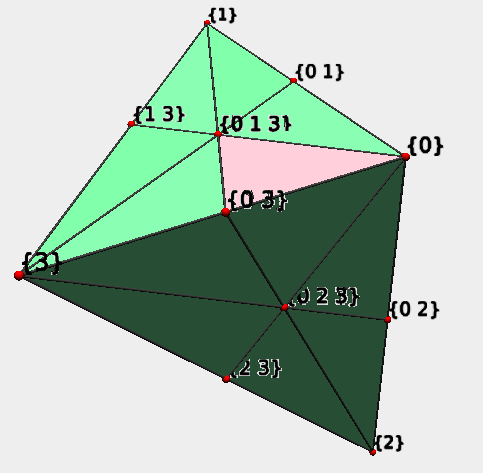 
`topaz` may also visualize distinguished subcomplexes or just sets of faces with different decorations (colors, styles, etc.). For example, to highlight the fourth facet of `$bs` in pink, do this:

    


In [18]:
$a = new Array<Set<Int>>(1); $a->[0] = $bs->FACETS->[4];
$bs->VISUAL->FACES($a, FacetColor => 'pink');

<!--
polymake for knusper
Mon May 11 13:37:01 2020
bs
-->


 
 
 bs 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->



The same can be used for the visualization of the face lattice. As an example, we have a look at a `morse matching` of the Klein bottle with its associated critical faces. In order to see the arrowheads in the picture clearly, you ought to use graphviz or svg to vizualize it. 

    


In [19]:
$k =  klein_bottle();
svg($k->VISUAL_FACE_LATTICE->MORSE_MATCHING->FACES($k->MORSE_MATCHING->CRITICAL_FACES));

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.0//EN" "http://www.w3.org/TR/2001/REC-SVG-20010904/DTD/svg10.dtd">
 
 Face lattice of k 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 1 5 
 
 0 2 3 
 
 0 2 4 
 
 0 3 5 
 
 1 2 3 
 
 1 2 5 
 
 1 3 4 
 
 2 4 5 
 
 3 4 5 
 
 0 1 8 
 
 0 6 7 
 
 0 4 6 
 
 0 7 8 
 
 1 6 7 
 
 1 6 8 
 
 1 4 7 
 
 4 6 8 
 
 4 7 8 
 
 0 1 
 
 0 5 
 
 1 5 
 
 0 2 
 
 0 3 
 
 2 3 
 
 0 4 
 
 2 4 
 
 3 5 
 
 1 2 
 
 1 3 
 
 2 5 
 
 1 4 
 
 3 4 
 
 4 5 
 
 0 8 
 
 1 8 
 
 0 6 
 
 0 7 
 
 6 7 
 
 4 6 
 
 7 8 
 
 1 6 
 
 1 7 
 
 6 8 
 
 4 7 
 
 4 8 
 
 0 
 
 1 
 
 5 
 
 2 
 
 3 
 
 4 
 
 8 
 
 6 
 
 7 
 
 
	<!--
	Generated using the Perl SVG Module V2.84
	by Ronan Oger
	Info: http://www.roitsystems.com/
	-->

Click here for additional output 
 
polymake: used package SVG
 Generated using the Perl SVG Module
 by Ronan Oger

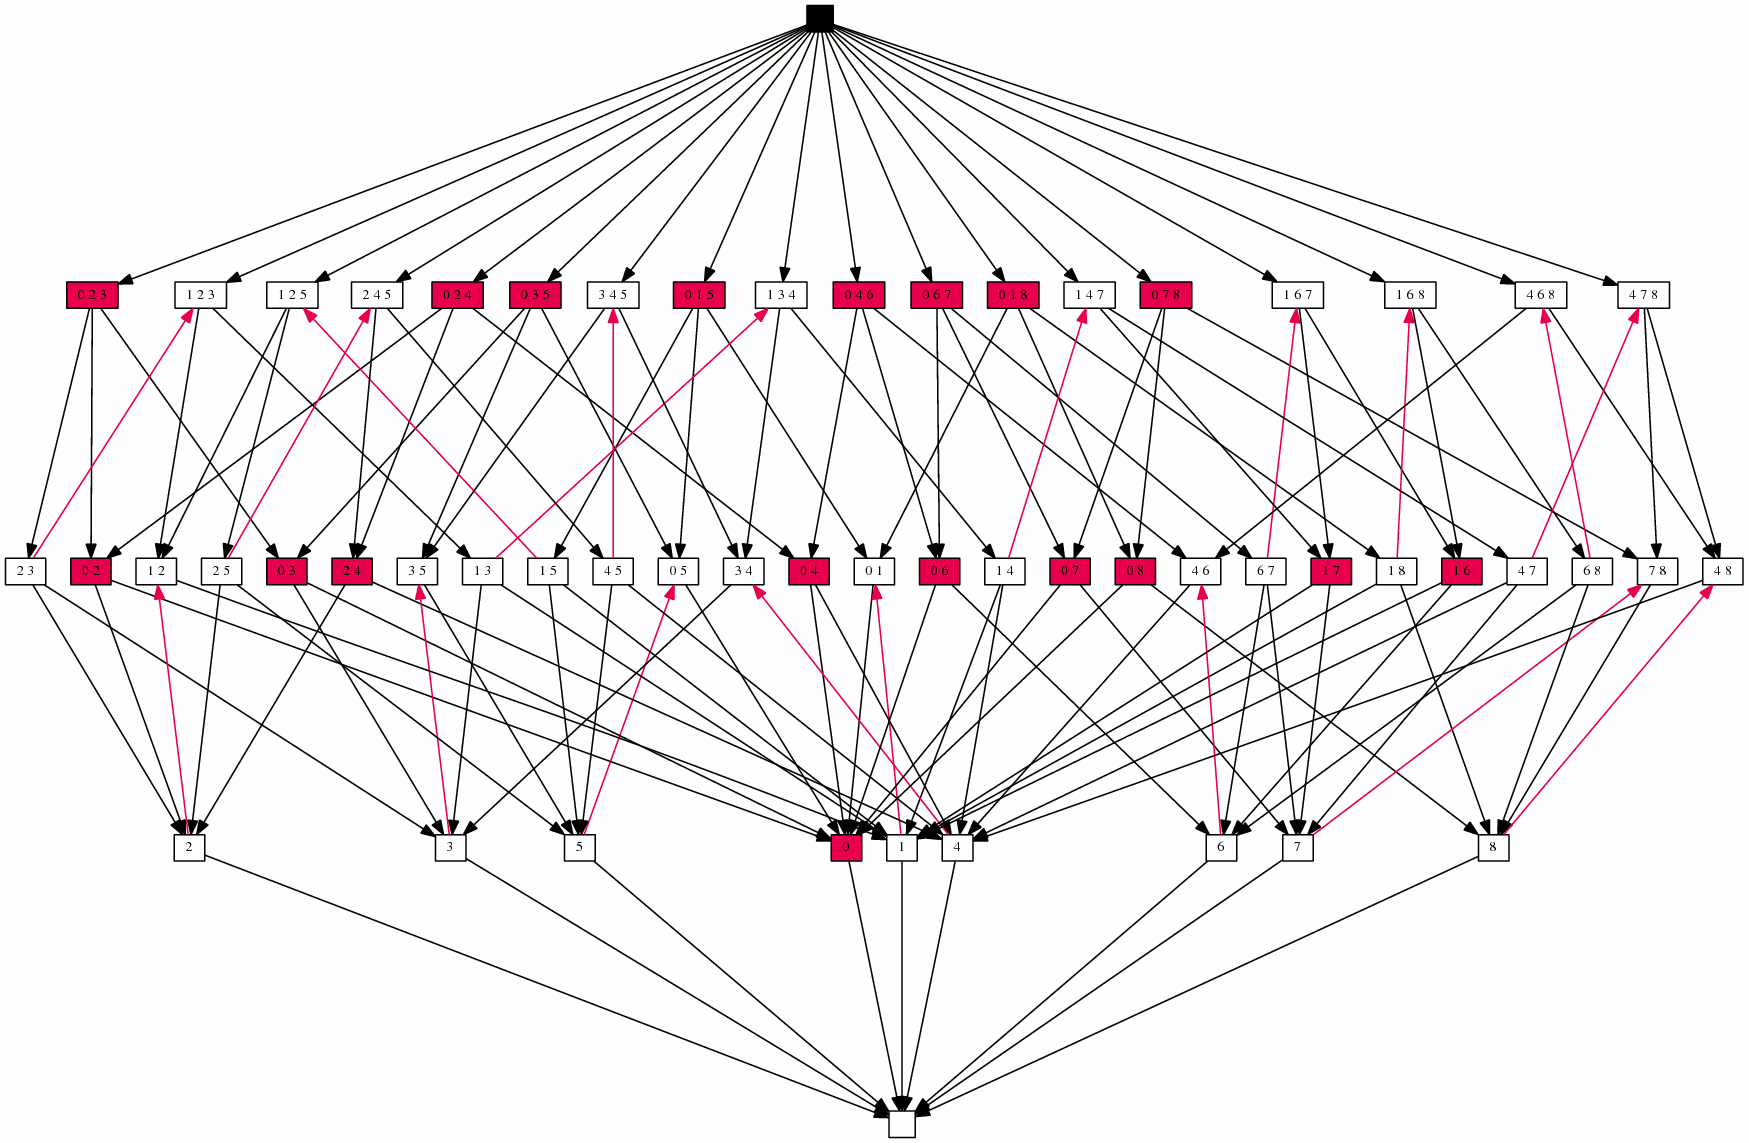
Here the matching of faces is denoted by reversed red arrows and the critical faces are marked red. Check that the graph remains acyclic.

For higher dimensional complexes that cannot be visualized in 3D, you can still have a look at the graphs while ignoring any specified coordinates by using `VISUAL_GRAPH`, `VISUAL_DUAL_GRAPH`, or `VISUAL_MIXED_GRAPH`. An easy example:

    


In [20]:
polytope::cube(3)->TRIANGULATION->VISUAL_MIXED_GRAPH;

<!--
polymake for knusper
Mon May 11 13:37:01 2020
GRAPH of 
-->


 
 
 GRAPH of 
 
 

 

 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


shows the primal and dual graph of the polytope together with an edge between a primal and a dual node iff the primal node represents a vertex of the corresponding facet of the dual node.

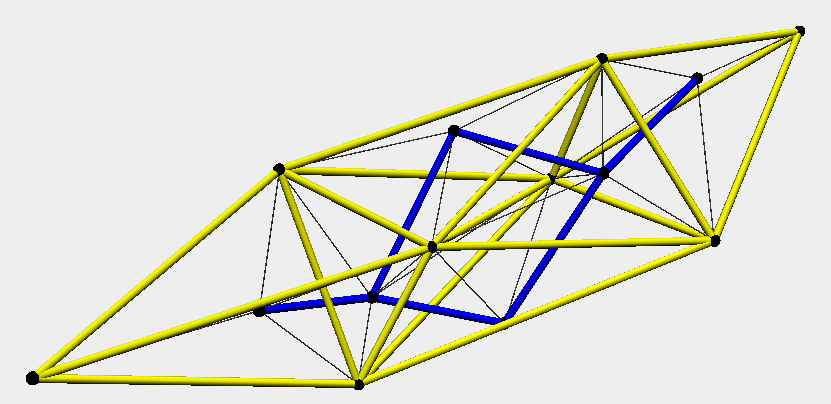

Visualization of the `HASSE_DIAGRAM` is possible via `VISUAL_FACE_LATTICE`. It renders the graph in a .pdf file. You can even pipe the tikz code to whatever location using the `tikz` client:

    
    tikz($s->VISUAL_FACE_LATTICE, File=>"/path/to/file.tikz");

